# Lecture 07

In [5]:
!pip install scikit-learn==1.0.1

     |████████████████████████████████| 23.2 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [2]:
from sklearn import metrics, datasets

## K-mean clustering

In [3]:
from sklearn.cluster import KMeans

In [4]:
data = datasets.load_iris(as_frame=True)
df = data['frame']
print(data['DESCR'])
display(df.info(), df.sample(10))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
59,5.2,2.7,3.9,1.4,1
30,4.8,3.1,1.6,0.2,0
5,5.4,3.9,1.7,0.4,0
112,6.8,3.0,5.5,2.1,2
38,4.4,3.0,1.3,0.2,0
124,6.7,3.3,5.7,2.1,2
40,5.0,3.5,1.3,0.3,0
125,7.2,3.2,6.0,1.8,2
80,5.5,2.4,3.8,1.1,1
32,5.2,4.1,1.5,0.1,0


In [5]:
X, y = df[['petal length (cm)', 'petal width (cm)']], df['target']

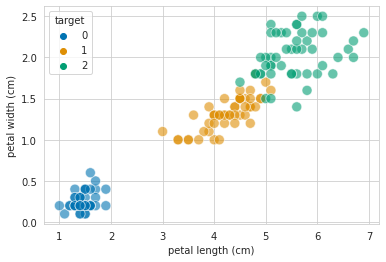

In [6]:
sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind'
)

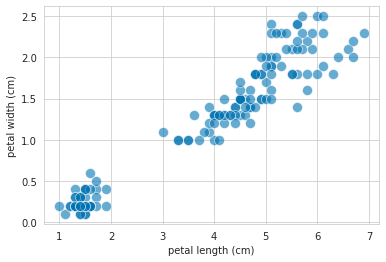

In [7]:
sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)',
    s=100, alpha=0.6, palette='colorblind'
)

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [9]:
display(y_pred, y.values)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
value_map = {1: 2, 2: 0, 0: 1}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Actual')

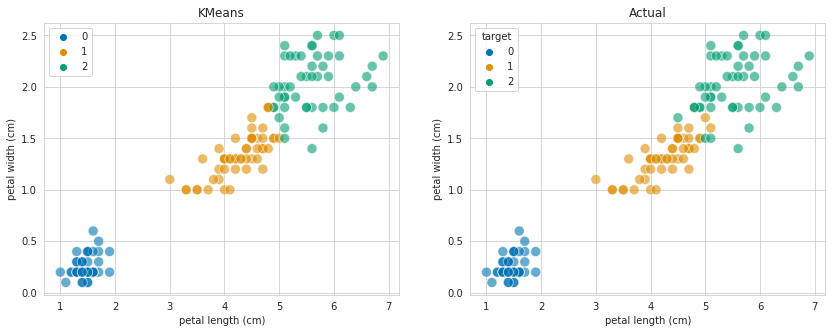

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [12]:
metrics.accuracy_score(y, y_pred)*100

96.0

### Clusters Centers

In [13]:
kmeans.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.462     , 0.246     ]])

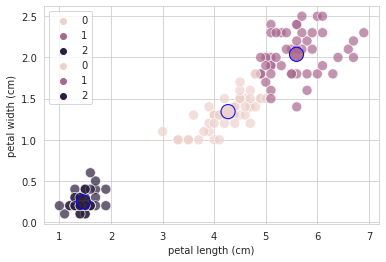

In [14]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=kmeans.labels_,
    s=100, alpha=0.7
)

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=np.arange(0, 3),
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

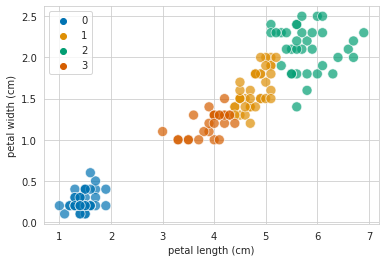

In [26]:
# Thử nghiệm với 4 nhóm
kmean = KMeans(n_clusters=4)
kmean.fit(X)
y_pred = kmean.predict(X)
sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7, palette='colorblind'
)

### How does it work?

![](https://cdn-images-1.medium.com/max/800/1*ZrwEraj9S-u_KOWdKWc8sQ.png)

In [15]:
from sklearn.metrics import pairwise_distances_argmin

n_clusters = 3


In [16]:
first_guess = X.sample(n_clusters)
first_guess['target'] = np.arange(0, n_clusters)
first_guess

,petal length (cm),petal width (cm),target
53,4.0,1.3,0
44,1.9,0.4,1
68,4.5,1.5,2


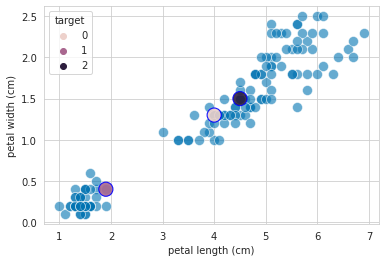

In [17]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)',
    s=100, alpha=0.6
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

In [18]:
pairwise_distances_argmin(X, first_guess.iloc[:, :2])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
y_pred = pairwise_distances_argmin(X, first_guess.iloc[:, :2])

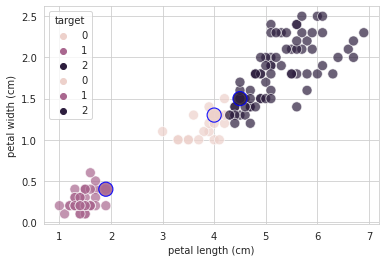

In [20]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

In [21]:
cluster_centers = X.groupby(y_pred).mean()
cluster_centers

,petal length (cm),petal width (cm)
0,3.847826,1.182609
1,1.462000,0.246000
2,5.222078,1.823377


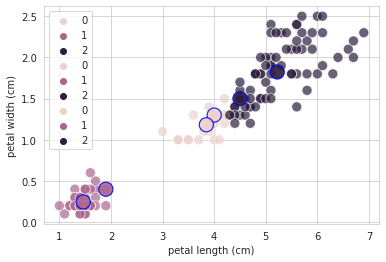

In [22]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

sns.scatterplot(
    data=cluster_centers, x='petal length (cm)', y='petal width (cm)', hue=cluster_centers.index,
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

### Finding optimal K

In [ ]:
kmeans.inertia_ # sum of distances

31.371358974358966

In [27]:
sse= []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))
sse = np.array(sse)
sse

array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.4830009 ],
       [  5.        ,  13.91690876],
       [  6.        ,  11.04023997],
       [  7.        ,   9.20331401],
       [  8.        ,   7.82388228],
       [  9.        ,   6.63268502],
       [ 10.        ,   5.82247092]])

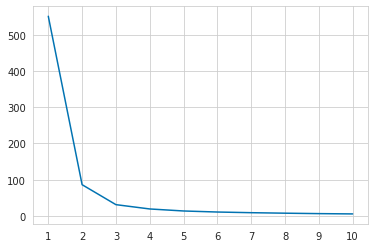

In [28]:
fig = plt.figure()
plt.xticks(sse[:, 0])
plt.plot(sse[:, 0], sse[:, 1])

In [ ]:
plt.xticks()

In [29]:
# Với bộ dữ liệu chất lượng rượu: wine
# Gộp nhóm 0 và 1 thành 1 loại, để loại 2 riêng (rượu chất lượng tốt) --> bài toán binary (2 lớp)
# Sử dụng 1 trong các thuật toán đã học (logistic, tree, forest, svm, kmeans) để xây dựng mô hình
# Yêu cầu cross-validate tối thiểu 30 lần
# Yêu cầu sử dụng GridSearch để tối ưu tham số

In [ ]:
# Giải thích feature_importances
# ROC và AUC

## Hierarchical Clustering

### Agglomerative vs Divisive

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181916/Untitled-Diagram-153-1.png)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3)
y_pred = ward.fit_predict(X)

NameError: ignored

In [ ]:
display(y_pred, y.values)

In [ ]:
value_map = {1: 0, 2: 1, 0: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [ ]:
metrics.accuracy_score(y, y_pred)*100

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:
ward = AgglomerativeClustering(compute_distances=True, n_clusters=3)
ward.fit(X)

fig = plt.figure(figsize=(10, 7))
plot_dendrogram(ward, truncate_mode='level', p=3)

## Gausian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture

gnm = GaussianMixture(n_components=3)
gnm.fit(X)
y_pred = gnm.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
value_map = {1: 0, 0: 1, 2: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Actual')

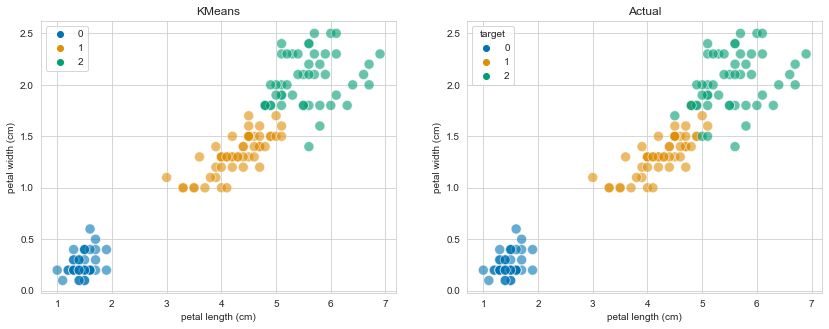

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [ ]:
metrics.accuracy_score(y, y_pred)*100

97.33333333333334

In [ ]:
gnm.predict_proba(X)[:20, :]

array([[1.06217066e-08, 9.99999989e-01, 1.64582608e-20],
       [1.06217066e-08, 9.99999989e-01, 1.64582608e-20],
       [5.48414102e-09, 9.99999995e-01, 6.85934072e-21],
       [2.69053509e-08, 9.99999973e-01, 5.56684268e-20],
       [1.06217066e-08, 9.99999989e-01, 1.64582608e-20],
       [1.59721304e-06, 9.99998403e-01, 9.12040287e-17],
       [1.73889970e-08, 9.99999983e-01, 1.33317921e-19],
       [2.69053509e-08, 9.99999973e-01, 5.56684268e-20],
       [1.06217066e-08, 9.99999989e-01, 1.64582608e-20],
       [2.65831387e-08, 9.99999973e-01, 2.00166023e-20],
       [2.69053509e-08, 9.99999973e-01, 5.56684268e-20],
       [8.91336466e-08, 9.99999911e-01, 2.65434509e-19],
       [1.04241519e-08, 9.99999990e-01, 4.90173314e-21],
       [3.14554699e-09, 9.99999997e-01, 5.64895674e-22],
       [3.70323778e-09, 9.99999996e-01, 4.02999269e-21],
       [1.14309786e-07, 9.99999886e-01, 6.04584548e-18],
       [2.39352556e-08, 9.99999976e-01, 1.58268050e-18],
       [1.73889970e-08, 9.99999

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gnm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=10, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

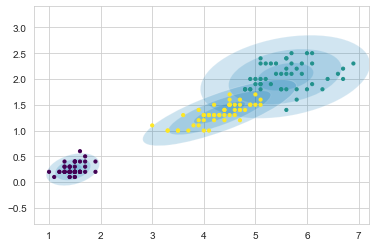

In [ ]:
plot_gnm(gnm, X.values)

## DBSCAN

## PCA

## Spectral Clustering